In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9

In [2]:
def galactic_distances(glat, glong, d):
    # angle from galactic centre
    if glong > 180:
        theta = 360.0 - glong
    else:
        theta = glong

    theta_rad = np.deg2rad(theta)

    # x and y lengths of triangle 1 
    # formed from sun, source position, and line towards Galctic centre
    tri1_x = d * np.sin(theta_rad)
    tri1_y = d * np.cos(theta_rad)
    
    # distance from Galactic centre to source/ hypotenuse of triangle 2
    # triangle 2 y distance is difference between distance from sun to Galactic centre, 8.3 kpc
    # and y distance from triangle 1
    tri2_y = 8.3 - tri1_y
    tri2_z = np.sqrt(tri2_y**2 + tri1_x**2)

    # height above Galactic plane
    h = d * np.tan(np.deg2rad(glat))

    return tri2_z, h

In [3]:
def app2abs(distance, app_mag):

    d = distance * u.Mpc 
    abs_mag = app_mag - (2.5 * np.log10(((d.value*10**6)/10)**2))

    #print(f'At distance = {np.round(d,2)}, the absolute magnitude is {np.round(abs_mag,2)}')

    return abs_mag

In [4]:
# create range of distances
dist_max = 21. # kpc
d_range = np.arange(0., dist_max, 1)

In [5]:
# calculate absolute magnitude for each distance
abs_mags_peak = []
abs_mags_qsnt = []

# peak magnitude (g-band)
app_mag_peak = 19.22 

# quiescent magitude (g-band)
app_mag_qsnt = 23.23

for d in d_range:
    d_mpc = d / 1000
    abs_mag_peak = app2abs(d_mpc, app_mag_peak)
    abs_mags_peak.append(abs_mag_peak)

    abs_mag_qsnt = app2abs(d_mpc, app_mag_qsnt)
    abs_mags_qsnt.append(abs_mag_qsnt)

/tmp/ipykernel_135/3965325694.py:4: RuntimeWarning: divide by zero encountered in log10
  abs_mag = app_mag - (2.5 * np.log10(((d.value*10**6)/10)**2))


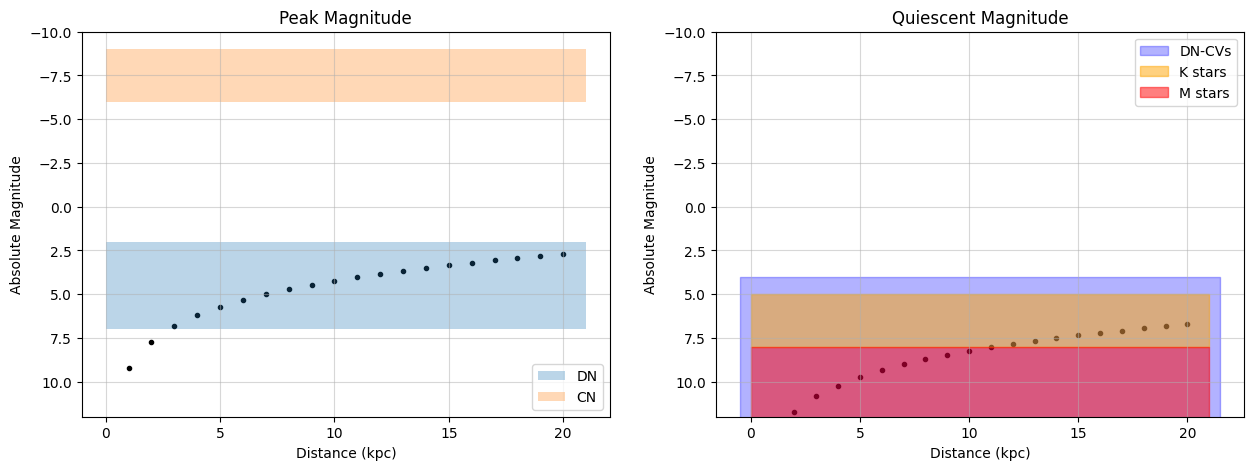

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.scatter(d_range, abs_mags_peak, marker='.', color='k')
# ax1.axhline(5.2, ls='--')
ax1.fill_between([0,dist_max], 2, 7, alpha = 0.3, label='DN') # Kawash, A. et al (2021)
ax1.fill_between([0,dist_max], -9, -6, alpha = 0.3, label='CN') # Kawash, A. et al (2021) (-10 -- -4), from Allen Shafter (-7.5 +/- 1.5)

ax1.set_ylabel('Absolute Magnitude')
ax1.set_xlabel('Distance (kpc)')
ax1.set_ylim([12,-10])
ax1.grid(alpha=0.5) 
ax1.set_title('Peak Magnitude')
ax1.legend()

#############################################

ax2.scatter(d_range, abs_mags_qsnt, marker='.', color='k')
ax2.fill_between([-0.5,dist_max+0.5], 4, 15, alpha = 0.3, color='blue', label='DN-CVs') # Coppejans, D. et al. (2016) 
ax2.fill_between([0,dist_max], 5,8, alpha = 0.5, color='orange', label='K stars')
ax2.fill_between([0,dist_max], 8, 17, alpha = 0.5, color='red', label='M stars')

ax2.set_ylabel('Absolute Magnitude')
ax2.set_xlabel('Distance (kpc)')
ax2.set_title('Quiescent Magnitude')
ax2.set_ylim([12,-10])
ax2.grid(alpha=0.5)
ax2.legend()

# plt.savefig('absmag_distance_close.png', bbox_inches='tight')

In [25]:
# create range of distances
dist_max = 1001. # Mpc
d_range_far = np.arange(0., dist_max, 1)

In [26]:
# calculate absolute magnitude for each distance
abs_mags_peak_far = []
abs_mags_qsnt = []

# peak magnitude (g-band)
app_mag_peak = 19.22 

# quiescent magitude (g-band)
app_mag_qsnt = 23.23

for d in d_range_far:
    d_mpc = d 
    abs_mag_peak_far = app2abs(d_mpc, app_mag_peak)
    abs_mags_peak_far.append(abs_mag_peak_far)

    abs_mag_qsnt = app2abs(d_mpc, app_mag_qsnt)
    abs_mags_qsnt.append(abs_mag_qsnt)

/tmp/ipykernel_135/3965325694.py:4: RuntimeWarning: divide by zero encountered in log10
  abs_mag = app_mag - (2.5 * np.log10(((d.value*10**6)/10)**2))


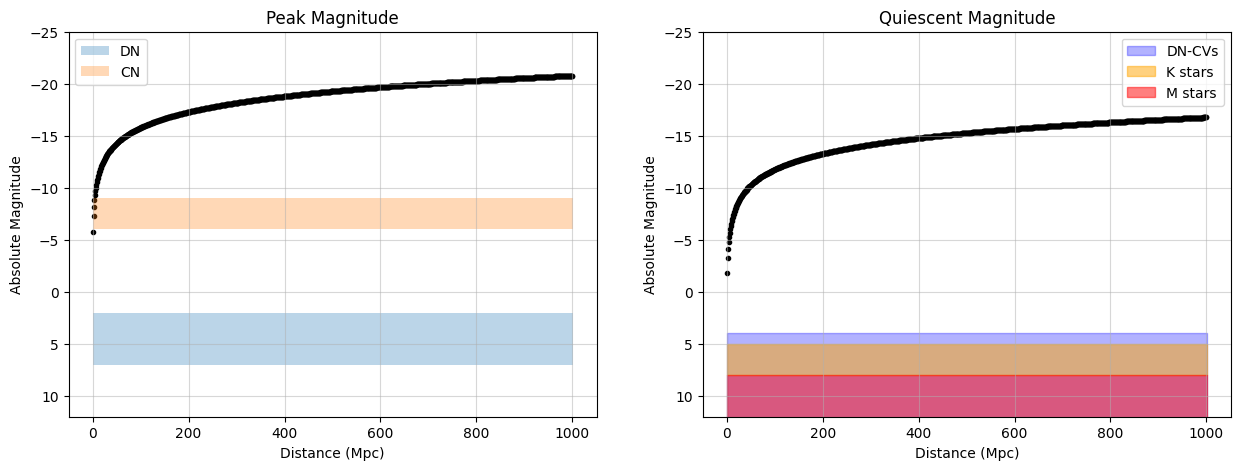

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.scatter(d_range_far, abs_mags_peak_far, marker='.', color='k')
# ax1.axhline(5.2, ls='--')
ax1.fill_between([0,dist_max], 2, 7, alpha = 0.3, label='DN') # Kawash, A. et al (2021)
ax1.fill_between([0,dist_max], -9, -6, alpha = 0.3, label='CN') # Kawash, A. et al (2021) (-10 -- -4), from Allen Shafter (-7.5 +/- 1.5)

ax1.set_ylabel('Absolute Magnitude')
ax1.set_xlabel('Distance (Mpc)')
ax1.set_ylim([12,-25])
ax1.grid(alpha=0.5) 
ax1.set_title('Peak Magnitude')
ax1.legend()

#############################################

ax2.scatter(d_range_far, abs_mags_qsnt, marker='.', color='k')
ax2.fill_between([-0.5,dist_max+0.5], 4, 15, alpha = 0.3, color='blue', label='DN-CVs') # Coppejans, D. et al. (2016) 
ax2.fill_between([0,dist_max], 5,8, alpha = 0.5, color='orange', label='K stars')
ax2.fill_between([0,dist_max], 8, 17, alpha = 0.5, color='red', label='M stars')

ax2.set_ylabel('Absolute Magnitude')
ax2.set_xlabel('Distance (Mpc)')
ax2.set_title('Quiescent Magnitude')
ax2.set_ylim([12,-25])
ax2.grid(alpha=0.5)
ax2.legend()

# plt.savefig('absmag_distance_close.png', bbox_inches='tight')

In [10]:
# if M = 5.23 

d = 10 * 10**((19.27-5.23)/5)
d_kpc = d/10**3
print('distance = ', d_kpc, 'kpc')

distance =  6.426877173170195 kpc


In [11]:
# calculate Galactic distance for abs mag
z, h = galactic_distances(17.32, 308.08, d_kpc)

print(z, 'kpc from Galactic centre')
print(h, 'kpc above Galactic plane')

6.662947643127093 kpc from Galactic centre
2.0042106343848274 kpc above Galactic plane


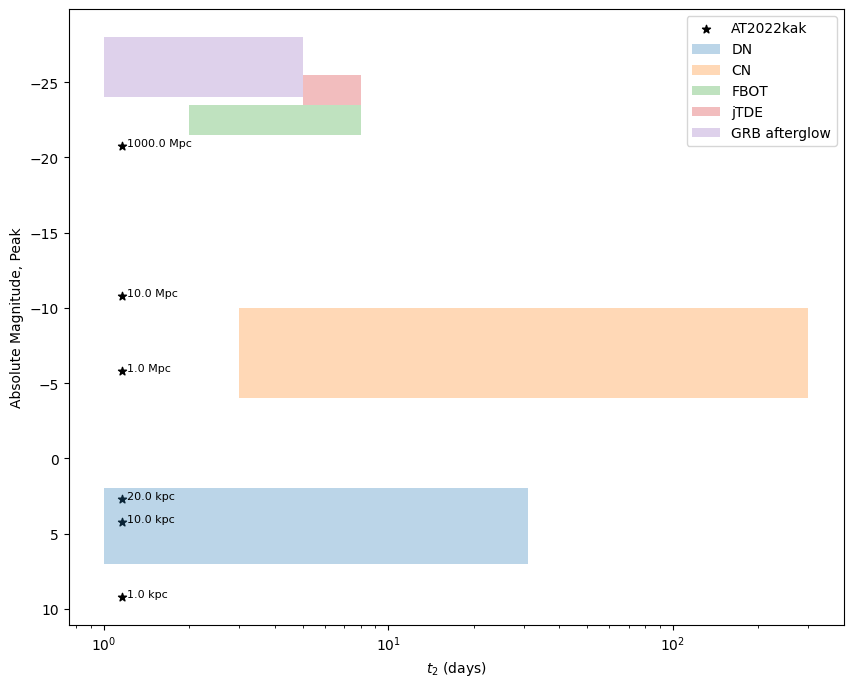

In [15]:
plt.figure(figsize=(10,8))

#### plot AT2022kak at different distances/ absolute mags

### near distances

kak_t2 = 1.16 #g-band
plt.scatter(kak_t2, abs_mags_peak[1], marker='*', color='k', label='AT2022kak')
plt.text(kak_t2+0.05, abs_mags_peak[1], f'{np.round(d_range[1],2)} kpc', fontsize=8)

plt.scatter(kak_t2, abs_mags_peak[10], marker='*', color='k')
plt.text(kak_t2+0.05, abs_mags_peak[10], f'{np.round(d_range[10],2)} kpc', fontsize=8)

plt.scatter(kak_t2, abs_mags_peak[-1], marker='*', color='k')
plt.text(kak_t2+0.05, abs_mags_peak[-1], f'{np.round(d_range[-1],2)} kpc', fontsize=8)

#### far distances

plt.scatter(kak_t2, abs_mags_peak_far[1], marker='*', color='k')
plt.text(kak_t2+0.05, abs_mags_peak_far[1], f'{np.round(d_range_far[1],2)} Mpc', fontsize=8)

plt.scatter(kak_t2, abs_mags_peak_far[10], marker='*', color='k')
plt.text(kak_t2+0.05, abs_mags_peak_far[10], f'{np.round(d_range_far[10],2)} Mpc', fontsize=8)

plt.scatter(kak_t2, abs_mags_peak_far[-1], marker='*', color='k')
plt.text(kak_t2+0.05, abs_mags_peak_far[-1], f'{np.round(d_range_far[-1],2)} Mpc', fontsize=8)


#### plot different transient classes

plt.fill_between([1, 31], 2, 7, alpha = 0.3, label='DN') # Kawash, A. et al (2021)
plt.fill_between([3,300], -10, -4, alpha = 0.3, label='CN') # Kawash, A. et al (2021)
plt.fill_between([2,8], -21.5, -23.5, alpha = 0.3, label='FBOT') # Inserra, C. et al (2019) - rough estimates
plt.fill_between([5,8], -23.5, -25.5, alpha = 0.3, label='jTDE') # Andreoni et al. (2022) & Levan et al. (2018)
plt.fill_between([1,5], -24, -28, alpha = 0.3, label='GRB afterglow') # Ho et al. (2022)


plt.xscale('log')
plt.gca().invert_yaxis()
plt.xlabel('$t_2$ (days)')
plt.ylabel('Absolute Magnitude, Peak')
plt.legend()

In [28]:
# converting distances and redshifts

z = 3.5 * cu.redshift
d = z.to(u.Mpc, cu.redshift_distance(WMAP9, kind="comoving"))
d

<Quantity 6958.30698881 Mpc>

In [29]:
app2abs(7000, 19.22)

np.float64(-25.005490200071286)